In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import datetime as dt
import os
import json
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [2]:
sns.set_style("whitegrid")
default_figsize = (10, 5)
color1 = "#3c3c3d"
color2 = "#c99d66"
color3 = "#ecf0f1"
color4 = "#14044d"
color5 = "#48cbd9"
color6 = "#716b94"
color7 = "#30ba96"
color_btc = "#f7931a"

In [3]:
## Check for stationarity
from statsmodels.tsa.stattools import adfuller

def is_stationary(timeseries):
    """
    Determines if a time series is stationary using the Augmented Dickey-Fuller (ADF) test.

    Parameters:
    timeseries (pandas.Series): The time series to test for stationarity.
    significance_level (float): The significance level used to determine the critical value for the test.

    Returns:
    bool: True if the time series is stationary, False otherwise.
    """

    # Perform ADF test
    adf_result = adfuller(timeseries)

    # Get test statistic and critical values
    test_statistic = adf_result[0]
    critical_values = adf_result[4]
    print("Result of Dickey-Fuller test:")
    df_output = pd.Series(adf_result[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    
    for key, value in adf_result[4].items():
        df_output["Critical Value (%s)"%key] = value
    print(df_output)
        
        
    # Compare test statistic to critical values to determine stationarity
    if test_statistic < critical_values['5%']:  ## 5% significance level
        return True
    else:
        return False
    


In [4]:
def plot_2_lineplots_sep_axis(dataframe, y1, y2, chart_title, label_l1, color_l1, label_l2, color_l2, 
                              save_name="charts/chart_test.png", is_l1_dollar = True, is_l2_dollar=True, l1_decimals=True, l2_decimals=True,
                              show_min_max=True, l1_margins = [], l2_margins = []):
    ## ETH Close vs BTC Close
    fig, ax = plt.subplots(figsize=default_figsize)
    font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}


    ax.set_title(r"{}".format(chart_title), **font)
    ax.set_xlabel('dátum', **font)
    line1 = ax.plot(dataframe.index, dataframe[y1], color_l1, label=label_l1)
    ax.set_ylabel(label_l1, **font)
    if is_l1_dollar:
        if l1_decimals:
            ax.yaxis.set_major_formatter("${x:,.2f}")
        else:
            ax.yaxis.set_major_formatter("${x:,.0f}")
    else:
        if l1_decimals:
            ax.yaxis.set_major_formatter("{x:,.2f}")
        else:
            ax.yaxis.set_major_formatter("{x:,.0f}")
        
    ax.tick_params(axis="y", labelcolor=color_l1)

    #if plot_trendline:
    #    pass
        
        
        
    if show_min_max:
        ##MIN-MAX POINT for Line1
        # Find the minimum and maximum values
        y_min = dataframe[y1].min()
        y_max = dataframe[y1].max()

        # Find the indices of the minimum and maximum values
        min_idx = dataframe[y1].argmin()
        max_idx = dataframe[y1].argmax()

        # Add dots for the minimum and maximum values
        ax.scatter(dataframe.index[min_idx], y_min, color=color_l1, s=15, zorder=3)
        ax.scatter(dataframe.index[max_idx], y_max, color=color_l1, s=15, zorder=3)

        # Add text labels for the minimum and maximum values
        if is_l1_dollar:
            if l1_decimals:
                ax.text(dataframe.index[min_idx]+pd.Timedelta(days=l1_margins[0]), y_min+l1_margins[1], f"Min: ${y_min:,.2f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
                ax.text(dataframe.index[max_idx]+pd.Timedelta(days=l1_margins[2]), y_max+l1_margins[3], f"Max: ${y_max:,.2f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
            else:
                ax.text(dataframe.index[min_idx]+pd.Timedelta(days=l1_margins[0]), y_min+l1_margins[1], f"Min: ${y_min:,.0f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
                ax.text(dataframe.index[max_idx]+pd.Timedelta(days=l1_margins[2]), y_max+l1_margins[3], f"Max: ${y_max:,.0f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
               
        else:
            if l1_decimals:
                ax.text(dataframe.index[min_idx]+pd.Timedelta(days=l1_margins[0]), y_min+l1_margins[1], f"Min: {y_min:,.2f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
                ax.text(dataframe.index[max_idx]+pd.Timedelta(days=l1_margins[2]), y_max+l1_margins[3], f"Max: {y_max:,.2f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
            else:
                ax.text(dataframe.index[min_idx]+pd.Timedelta(days=l1_margins[0]), y_min+l1_margins[1], f"Min: {y_min:,.0f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)
                ax.text(dataframe.index[max_idx]+pd.Timedelta(days=l1_margins[2]), y_max+l1_margins[3], f"Max: {y_max:,.0f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l1)

    ax2 = ax.twinx()
    line2 = ax2.plot(dataframe.index, dataframe[y2], color_l2, label=label_l2, alpha=1)
    ax2.set_ylabel(label_l2, **font)
    if is_l2_dollar:
        if l2_decimals == True:
            ax2.yaxis.set_major_formatter("${x:,.2f}")
        else:
            ax2.yaxis.set_major_formatter("${x:,.0f}")
    else:
        if l2_decimals == True:
            ax2.yaxis.set_major_formatter("{x:,.2f}")
        else:
            ax2.yaxis.set_major_formatter("{x:,.0f}")

    ax2.tick_params(axis="y", labelcolor=color_l2)


    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax.legend(lines, labels, loc=0)

    ax2.spines['left'].set_color(color_l1)
    ax2.spines['right'].set_color(color_l2)

    if show_min_max:
        ##MIN-MAX POINT for Line2
        # Find the minimum and maximum values
        y_min = dataframe[y2].min()
        y_max = dataframe[y2].max()

        # Find the indices of the minimum and maximum values
        min_idx = dataframe[y2].argmin()
        max_idx = dataframe[y2].argmax()

        # Add dots for the minimum and maximum values
        ax2.scatter(dataframe.index[min_idx], y_min, color=color_l2, s=15, zorder=3)
        ax2.scatter(dataframe.index[max_idx], y_max, color=color_l2, s=15, zorder=3)
        if is_l2_dollar:
            if l2_decimals:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l2_margins[0]), y_min+l2_margins[1], f"Min: ${y_min:.2f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l2_margins[2]), y_max+l2_margins[3], f"Max: ${y_max:,.2f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
            else:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l2_margins[0]), y_min+l2_margins[1], f"Min: ${y_min:.0f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l2_margins[2]), y_max+l2_margins[3], f"Max: ${y_max:,.0f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
    
        else:
            if l2_decimals:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l2_margins[0]), y_min+l2_margins[1], f"Min: {y_min:.2f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l2_margins[2]), y_max+l2_margins[3], f"Max: {y_max:,.2f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
            else:
                # Add text labels for the minimum and maximum values
                ax2.text(dataframe.index[min_idx]+pd.Timedelta(days=l2_margins[0]), y_min+l2_margins[1], f"Min: {y_min:.0f} ({dataframe.index[min_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)
                ax2.text(dataframe.index[max_idx]+pd.Timedelta(days=l2_margins[2]), y_max+l2_margins[3], f"Max: {y_max:,.0f} \n ({dataframe.index[max_idx].strftime('%d/%m/%y')})", fontsize=10, weight="bold", color=color_l2)

            
            
    plt.tight_layout()
    plt.savefig(save_name)
    plt.show()
    plt.close()

In [5]:
df = pd.read_csv("training_dataset.csv", index_col="date", parse_dates=True)

In [6]:
df.columns[df.isnull().any()].tolist()

['smi', 'smi_signal', 'ma_26', 'ema_26', 'upper_band', 'lower_band']

In [7]:
df[df.columns[df.isnull().any()].tolist()] = df[df.columns[df.isnull().any()].tolist()].fillna(method="bfill")

In [8]:
df.index.freq = "D"

In [9]:
df.head()

,month,eth_open,eth_high,eth_low,eth_close,eth_volume,eth_qav,eth_num_trades,eth_taker_base_vol,eth_taker_quote_vol,...,smi,smi_signal,ma_12,ma_26,ema_12,ema_26,obv,mfi,upper_band,lower_band
date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,2017-09-01,386.44,394.39,383.18,388.46,4198.68434,1.635228e+06,4124.0,1564.05531,6.096309e+05,...,-12.212548,-21.164389,346.524167,326.348077,346.524167,326.348077,23109.64307,88.346876,396.369992,266.133008
2017-09-02,2017-09-01,388.58,394.32,320.08,343.14,8240.32724,2.904008e+06,8217.0,2460.66776,8.684873e+05,...,-12.212548,-21.164389,348.178333,326.348077,348.178333,326.348077,14869.31583,80.426793,396.369992,266.133008
2017-09-03,2017-09-01,343.56,367.28,320.08,341.77,5253.62211,1.801703e+06,6153.0,2240.91753,7.679383e+05,...,-12.212548,-21.164389,350.842500,326.348077,350.842500,326.348077,9615.69372,74.419284,396.369992,266.133008
2017-09-04,2017-09-01,339.29,344.55,267.94,283.77,6737.81061,2.002446e+06,7403.0,2954.16805,8.770111e+05,...,-26.876901,-21.164389,348.178333,326.348077,348.178333,326.348077,2877.88311,67.246410,396.369992,266.133008
2017-09-05,2017-09-01,286.81,321.52,235.55,312.09,8344.41924,2.397491e+06,8999.0,4312.97282,1.251959e+06,...,-24.403719,-21.164389,347.234167,326.348077,347.234167,326.348077,11222.30235,66.412993,396.369992,266.133008


In [10]:
df.head()

,month,eth_open,eth_high,eth_low,eth_close,eth_volume,eth_qav,eth_num_trades,eth_taker_base_vol,eth_taker_quote_vol,...,smi,smi_signal,ma_12,ma_26,ema_12,ema_26,obv,mfi,upper_band,lower_band
date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,2017-09-01,386.44,394.39,383.18,388.46,4198.68434,1.635228e+06,4124.0,1564.05531,6.096309e+05,...,-12.212548,-21.164389,346.524167,326.348077,346.524167,326.348077,23109.64307,88.346876,396.369992,266.133008
2017-09-02,2017-09-01,388.58,394.32,320.08,343.14,8240.32724,2.904008e+06,8217.0,2460.66776,8.684873e+05,...,-12.212548,-21.164389,348.178333,326.348077,348.178333,326.348077,14869.31583,80.426793,396.369992,266.133008
2017-09-03,2017-09-01,343.56,367.28,320.08,341.77,5253.62211,1.801703e+06,6153.0,2240.91753,7.679383e+05,...,-12.212548,-21.164389,350.842500,326.348077,350.842500,326.348077,9615.69372,74.419284,396.369992,266.133008
2017-09-04,2017-09-01,339.29,344.55,267.94,283.77,6737.81061,2.002446e+06,7403.0,2954.16805,8.770111e+05,...,-26.876901,-21.164389,348.178333,326.348077,348.178333,326.348077,2877.88311,67.246410,396.369992,266.133008
2017-09-05,2017-09-01,286.81,321.52,235.55,312.09,8344.41924,2.397491e+06,8999.0,4312.97282,1.251959e+06,...,-24.403719,-21.164389,347.234167,326.348077,347.234167,326.348077,11222.30235,66.412993,396.369992,266.133008


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2017-09-01 to 2023-03-07
Freq: D
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     2014 non-null   object 
 1   eth_open                  2014 non-null   float64
 2   eth_high                  2014 non-null   float64
 3   eth_low                   2014 non-null   float64
 4   eth_close                 2014 non-null   float64
 5   eth_volume                2014 non-null   float64
 6   eth_qav                   2014 non-null   float64
 7   eth_num_trades            2014 non-null   float64
 8   eth_taker_base_vol        2014 non-null   float64
 9   eth_taker_quote_vol       2014 non-null   float64
 10  btc_close                 2014 non-null   float64
 11  btc_volume                2014 non-null   float64
 12  btc_num_trades            2014 non-null   float64
 13  fed_eff_funds_rate_close  2014 non-nu

In [12]:
df.shape

(2014, 44)

# Basic

- Ethereum related data: eth_close, eth_volume, eth_num_trades

In [13]:
df[["eth_open","eth_close","eth_low", "eth_high","eth_volume","eth_num_trades", "eth_qav", "eth_taker_base_vol", "eth_taker_quote_vol"]].head()

,eth_open,eth_close,eth_low,eth_high,eth_volume,eth_num_trades,eth_qav,eth_taker_base_vol,eth_taker_quote_vol
date,,,,,,,,,
2017-09-01,386.44,388.46,383.18,394.39,4198.68434,4124.0,1.635228e+06,1564.05531,6.096309e+05
2017-09-02,388.58,343.14,320.08,394.32,8240.32724,8217.0,2.904008e+06,2460.66776,8.684873e+05
2017-09-03,343.56,341.77,320.08,367.28,5253.62211,6153.0,1.801703e+06,2240.91753,7.679383e+05
2017-09-04,339.29,283.77,267.94,344.55,6737.81061,7403.0,2.002446e+06,2954.16805,8.770111e+05
2017-09-05,286.81,312.09,235.55,321.52,8344.41924,8999.0,2.397491e+06,4312.97282,1.251959e+06


In [14]:
df.drop(columns=["eth_open", "eth_high", "eth_low", "month", "eth_qav", "eth_taker_base_vol", "eth_taker_quote_vol"], inplace=True)

In [15]:
basic = df[['eth_close','eth_volume','eth_num_trades']]

In [16]:
basic.head()

,eth_close,eth_volume,eth_num_trades
date,,,
2017-09-01,388.46,4198.68434,4124.0
2017-09-02,343.14,8240.32724,8217.0
2017-09-03,341.77,5253.62211,6153.0
2017-09-04,283.77,6737.81061,7403.0
2017-09-05,312.09,8344.41924,8999.0


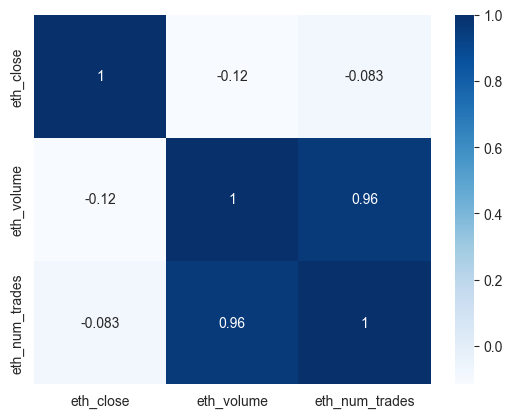

In [17]:
sns.heatmap(np.log(basic).diff().dropna().corr(), annot=True, cmap="Blues"); ## Stationary
plt.savefig('charts/basic/correlation_matrix.png')
plt.show()

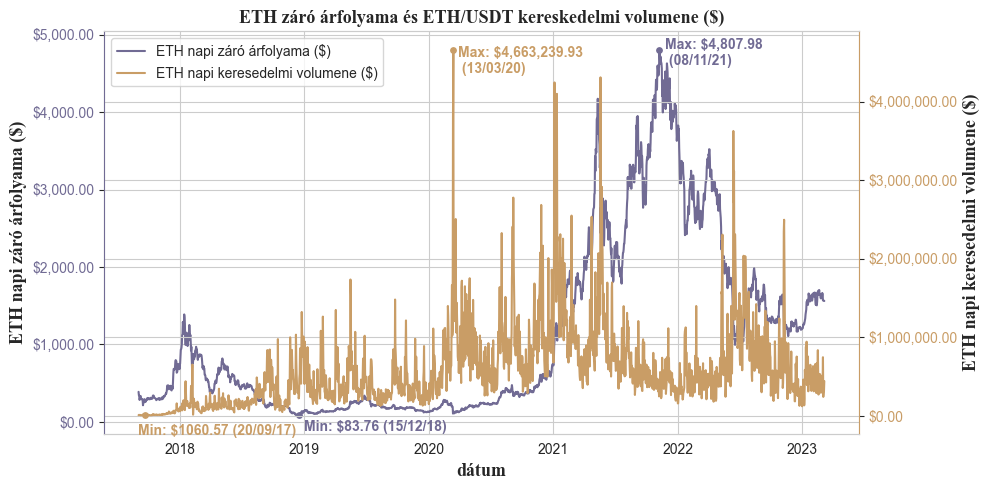

In [18]:
plot_2_lineplots_sep_axis(basic,
                          "eth_close", 
                          "eth_volume", 
                          "ETH záró árfolyama és ETH/USDT kereskedelmi volumene ($)",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "ETH napi keresedelmi volumene ($)", 
                          color2,
                          save_name='charts/basic/close_volume.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=True,
                          l2_decimals=True,
                          show_min_max=True,
                          l1_margins = [15, -200, 15, -200], l2_margins=[-20, -250000, 15, -300000])

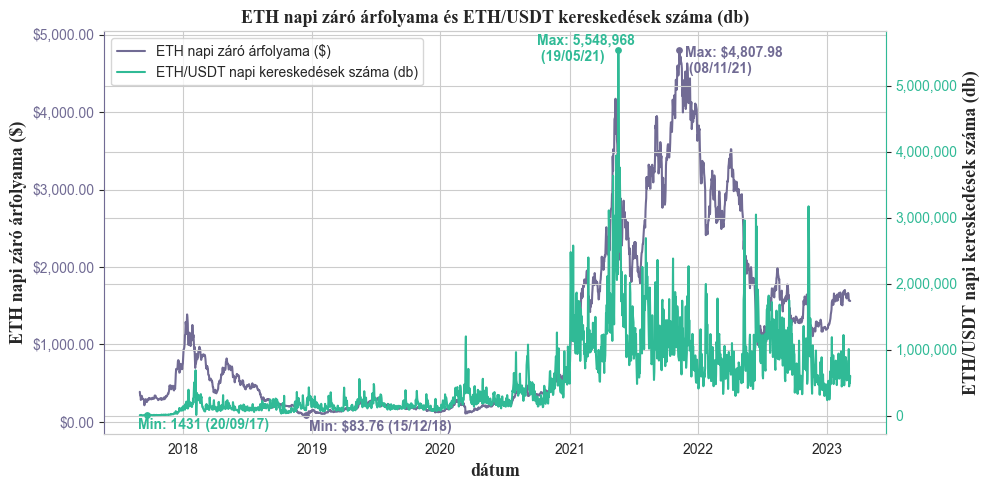

In [21]:
plot_2_lineplots_sep_axis(basic,
                          "eth_close", 
                          "eth_num_trades", 
                          "ETH napi záró árfolyama és ETH/USDT kereskedések száma (db)",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "ETH/USDT napi kereskedések száma (db)", 
                          color7,
                          save_name='charts/basic/num_trades.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=False,
                          l2_decimals=False,
                          show_min_max=True,
                          l1_margins = [10, -200, 15, -300], l2_margins=[-25, -200000, -230, -170000])

# Section I.

- BTC, Fed, Nasdaq, S&P500, US Breakeven, US Treasury, Gold and Silver price

In [22]:
section1 = df[['btc_close', 'btc_volume', 'btc_num_trades', 'fed_eff_funds_rate_close', 'nasdaq_close', 'real_estate_index_close', 'sp500_close', 'silver_value',
       'us_breake_inf_rate_5y', 'us_breake_inf_rate_10y', 'us_treasury_10yt2y_diff', 'us_treasury_10yt3m_diff', 'us_treasury_total_vol', 'gold_value', 'eth_close']]

In [23]:
section1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2017-09-01 to 2023-03-07
Freq: D
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   btc_close                 2014 non-null   float64
 1   btc_volume                2014 non-null   float64
 2   btc_num_trades            2014 non-null   float64
 3   fed_eff_funds_rate_close  2014 non-null   float64
 4   nasdaq_close              2014 non-null   float64
 5   real_estate_index_close   2014 non-null   float64
 6   sp500_close               2014 non-null   float64
 7   silver_value              2014 non-null   float64
 8   us_breake_inf_rate_5y     2014 non-null   float64
 9   us_breake_inf_rate_10y    2014 non-null   float64
 10  us_treasury_10yt2y_diff   2014 non-null   float64
 11  us_treasury_10yt3m_diff   2014 non-null   float64
 12  us_treasury_total_vol     2014 non-null   float64
 13  gold_value                2014 non-nu

In [24]:
section1.shape

(2014, 15)

C:\Users\Dani\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\Dani\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


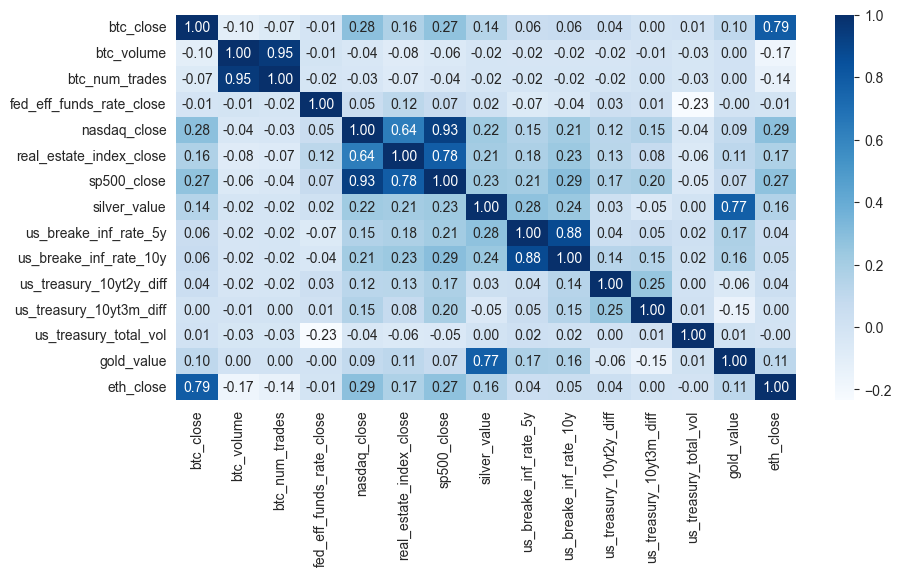

In [25]:
plt.figure(figsize=default_figsize)
sns.heatmap(np.log(section1).diff().dropna().corr(), annot=True, cmap="Blues", fmt=".2f");
plt.show()

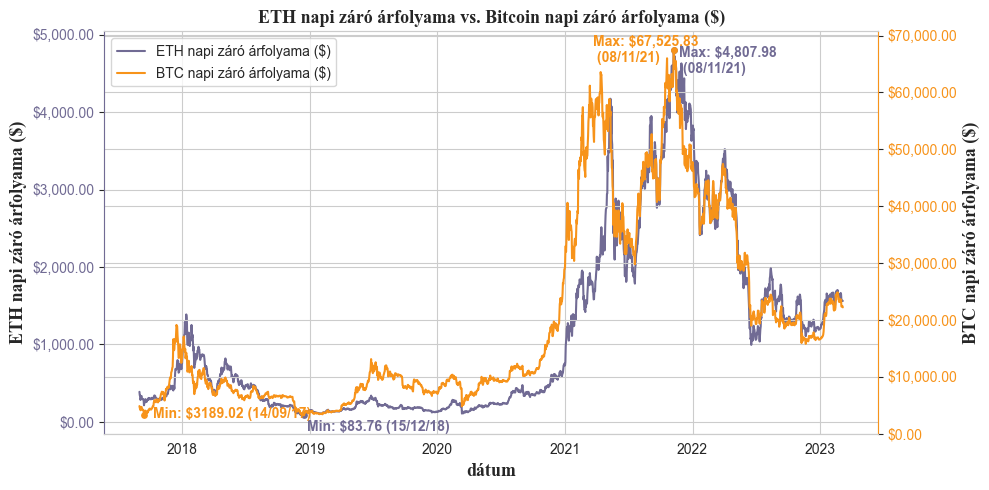

In [47]:
plot_2_lineplots_sep_axis(section1,
                          "eth_close", 
                          "btc_close", 
                          "ETH napi záró árfolyama vs. Bitcoin napi záró árfolyama ($)",
                          "ETH napi záró árfolyama ($)", 
                          color6, 
                          "BTC napi záró árfolyama ($)", 
                          color_btc,
                          save_name='charts/section1/eth_vs_btc.png', 
                          is_l1_dollar=True,
                          l1_decimals=True,
                          is_l2_dollar=True,
                          l2_decimals=True,
                          show_min_max=True,
                          l1_margins = [10, -200, 15, -300], l2_margins=[25, -500, -230, -2100])

In [48]:
# Fit a third-degree polynomial curve to the data
x = np.arange(len(df))
y = df['your_data_column'].values
p = np.polyfit(x, y, deg=3)

# Plot the polynomial curve as a trendline
plt.plot(df.index, np.polyval(p, x), 'r--', label='Trendline')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Your Data')
plt.title('Your Title')
plt.legend()
plt.show()

KeyError: 'your_data_column'

In [ ]:
test = df[[i for i in df if i != "month"]]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
test = pd.DataFrame(scaler.fit_transform(df.drop(columns="month")), columns=df.drop(columns="month").columns)

In [ ]:
X = test.drop(labels=['eth_close'], axis=1)
y = test["eth_close"]

In [ ]:
X_train = X.iloc[:1611, :]
y_train = y.iloc[:1611]

X_test = X.iloc[1611:, :]
y_test = y.iloc[1611:]


In [ ]:
X_test.shape

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define your input data
# In this example, we have 3 features and 100 samples
X = X_train

# Define your output data
# In this example, we want to predict a single number for each sample
y = y_train

# Define your model architecture
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(None, 39)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(Dense(1))

# Compile your model
model.compile(loss='mse', optimizer='adam')

# Train your model
model.fit(X.values.reshape(1611, 1, 39), y, epochs=20)

# Use your model to make predictions
predictions = model.predict(X_test.values.reshape(403,1,39))


In [ ]:
print(y_test)

In [ ]:
predictions = predictions.reshape(403,1)

In [ ]:
plt.plot(predictions)

In [ ]:
plt.plot(y_test)

### APPENDIX

### Plot shifted correlation between eth_volume and eth_num_trades

In [ ]:
is_stationary(np.log(basic.eth_volume).diff().dropna())

In [ ]:
is_stationary(np.log(basic.eth_close).diff().dropna())

In [ ]:
stationary_eth_close = np.log(basic.eth_close).diff().dropna()

In [ ]:
stationary_eth_volume = np.log(basic.eth_volume).diff().dropna()

In [ ]:
stationary_eth_num_trades = np.log(basic.eth_num_trades).diff().dropna()

In [ ]:
from scipy import signal
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_ielts = ccf_values(stationary_eth_close, stationary_eth_volume)
ccf_ielts

In [ ]:
lags = signal.correlation_lags(len(stationary_eth_close), len(stationary_eth_volume))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = color6, lw = 1,  linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = color6, lw = 1, 
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation Eth Close and ETH Volume', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_ielts)

In [ ]:
correlation = signal.correlate(stationary_eth_close, stationary_eth_volume, mode="full")
lags = signal.correlation_lags(stationary_eth_close.size, stationary_eth_volume.size, mode="full")
lag = lags[np.argmax(correlation)]
print("Most effective lag:", lag)
np.max(ccf_ielts), np.min(ccf_ielts)

In [ ]:
##Num trades

In [ ]:
ccf_ielts = ccf_values(stationary_eth_close, stationary_eth_num_trades)
lags = signal.correlation_lags(len(stationary_eth_close), len(stationary_eth_num_trades))
ccf_plot(lags, ccf_ielts)

In [ ]:
lag = lags[np.argmax(correlation)]

In [ ]:
lag

### Findings: 
It is a non-stationary dataset, with a heavy trend and seasonality based on 365 day period

In [ ]:
## Check for stationarity
from statsmodels.tsa.stattools import adfuller

def is_stationary(timeseries):
    """
    Determines if a time series is stationary using the Augmented Dickey-Fuller (ADF) test.

    Parameters:
    timeseries (pandas.Series): The time series to test for stationarity.
    significance_level (float): The significance level used to determine the critical value for the test.

    Returns:
    bool: True if the time series is stationary, False otherwise.
    """

    # Perform ADF test
    adf_result = adfuller(timeseries)

    # Get test statistic and critical values
    test_statistic = adf_result[0]
    critical_values = adf_result[4]
    print("Result of Dickey-Fuller test:")
    df_output = pd.Series(adf_result[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    
    for key, value in adf_result[4].items():
        df_output["Critical Value (%s)"%key] = value
    print(df_output)
        
        
    # Compare test statistic to critical values to determine stationarity
    if test_statistic < critical_values['5%']:  ## 5% significance level
        return True
    else:
        return False
    


In [ ]:
is_stationary(df.eth_close)

In [ ]:
df_log = np.log(df.eth_close)